In [53]:
import pandas as pd

# Read the data file (adjust the filename/path as needed)
df = pd.read_csv('data2.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

print("\nColumn names:")
print(df.columns.tolist())

print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (25507, 123)

First few rows:
    Q1   Q2   Q3    Q4    Q5   Q6   Q7   Q8   Q9  Q10  ...  qnunwtg  qnfrvgg  \
0  3.0  1.0  2.0  1.52  40.0  3.0  3.0  3.0  1.0  2.0  ...      2.0      2.0   
1  3.0  1.0  2.0  1.62  48.0  3.0  5.0  5.0  1.0  2.0  ...      2.0      1.0   
2  3.0  1.0  2.0  1.53  43.0  1.0  4.0  4.0  1.0  1.0  ...      2.0      2.0   
3  3.0  1.0  2.0  1.48  48.0  1.0  3.0  7.0  2.0  1.0  ...      2.0      1.0   
4  3.0  1.0  1.0  1.46  33.0  1.0  4.0  5.0  2.0  1.0  ...      2.0      1.0   

   qnanytbg  qnpa7g  qnpe5g  qnc1g  qnc2g    weight    stratum  psu  
0       2.0     2.0     2.0    NaN    NaN  143.3963  201101002    4  
1       2.0     2.0     1.0    NaN    NaN  143.3963  201101002    4  
2       2.0     2.0     1.0    NaN    NaN  143.3963  201101002    4  
3       2.0     2.0     1.0    NaN    NaN  143.3963  201101002    4  
4       2.0     2.0     2.0    NaN    1.0  158.4936  201101002    4  

[5 rows x 123 columns]

Dataset info:
<class 'pandas.

In [54]:
# Select only the specified columns
selected_df = df[['Q1', 'Q2', 'Q22', 'Q23', 'QN26', 'Q49', 'qnpa7g']]
print(selected_df)

        Q1   Q2  Q22  Q23  QN26  Q49  qnpa7g
0      3.0  1.0  2.0  1.0   2.0  1.0     2.0
1      3.0  1.0  1.0  1.0   1.0  5.0     2.0
2      3.0  1.0  3.0  3.0   2.0  3.0     2.0
3      3.0  1.0  1.0  2.0   2.0  3.0     2.0
4      3.0  1.0  2.0  4.0   2.0  2.0     2.0
...    ...  ...  ...  ...   ...  ...     ...
25502  5.0  1.0  2.0  1.0   2.0  3.0     2.0
25503  5.0  1.0  1.0  3.0   2.0  3.0     2.0
25504  5.0  1.0  1.0  1.0   2.0  3.0     2.0
25505  5.0  2.0  3.0  3.0   2.0  1.0     2.0
25506  5.0  2.0  3.0  3.0   2.0  3.0     2.0

[25507 rows x 7 columns]


New categorical variables created:
  - high_loneliness: 1 if Q22 >= 4 (Most/Always)
  - high_worry_sleep: 1 if Q23 >= 4 (Most/Always)
  - high_distress: 1 if either Q22 or Q23 >= 4
  - age_band: Age grouped into bands (≤12, 13-14, 15-16, 17-18+)

Preview of new variables:
    Q1   Q2  Q22  Q23 age_band  high_loneliness  high_worry_sleep  \
0  3.0  1.0  2.0  1.0    13-14                0                 0   
1  3.0  1.0  1.0  1.0    13-14                0                 0   
2  3.0  1.0  3.0  3.0    13-14                0                 0   
3  3.0  1.0  1.0  2.0    13-14                0                 0   
4  3.0  1.0  2.0  4.0    13-14                0                 1   
5  3.0  2.0  3.0  2.0    13-14                0                 0   
6  3.0  1.0  2.0  1.0    13-14                0                 0   
7  3.0  1.0  3.0  2.0    13-14                0                 0   
8  3.0  1.0  2.0  2.0    13-14                0                 0   
9  3.0  1.0  3.0  2.0    13-14       

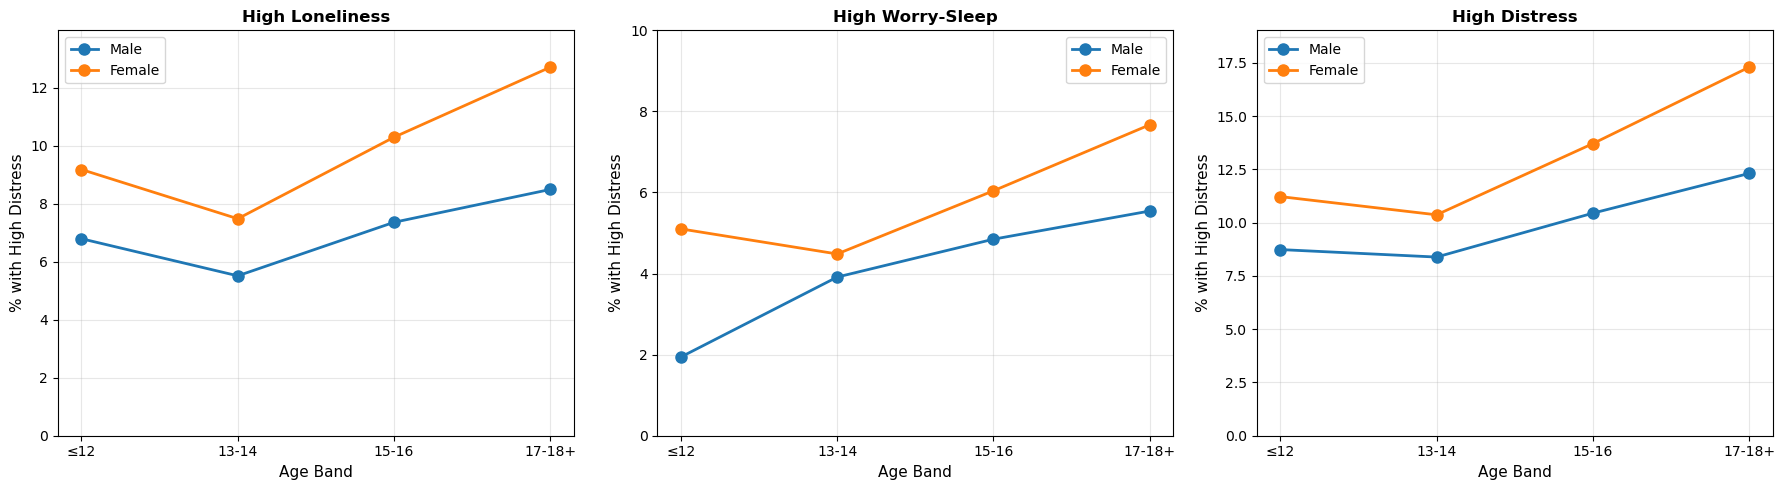


INTERPRETATION:
Shows % of students reporting 'Most of the time' or 'Always'
Clear trends by age band with sex differences immediately visible

New variables available in dataframe for further analysis:
  df['high_loneliness'], df['high_worry_sleep'], df['high_distress'], df['age_band']


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
AGE_BANDS_ORDER = ['≤12', '13-14', '15-16', '17-18+']
SEX_LABELS = {1: 'Male', 2: 'Female'}

# Create binary "high distress" categorical variables
# High = 'Most of the time' (4) or 'Always' (5)
df['high_loneliness'] = (df['Q22'] >= 4).astype(int)
df['high_worry_sleep'] = (df['Q23'] >= 4).astype(int)
df['high_distress'] = ((df['Q22'] >= 4) | (df['Q23'] >= 4)).astype(int)

# Create age bands for analysis
df['age_band'] = df['Q1'].apply(lambda x: 
    '≤12' if x <= 2 else '13-14' if x in [3,4] else '15-16' if x in [5,6] else '17-18+')

print("New categorical variables created:")
print("  - high_loneliness: 1 if Q22 >= 4 (Most/Always)")
print("  - high_worry_sleep: 1 if Q23 >= 4 (Most/Always)")
print("  - high_distress: 1 if either Q22 or Q23 >= 4")
print("  - age_band: Age grouped into bands (≤12, 13-14, 15-16, 17-18+)")
print("\nPreview of new variables:")
print(df[['Q1', 'Q2', 'Q22', 'Q23', 'age_band', 'high_loneliness', 'high_worry_sleep', 'high_distress']].head(10))

# ============================================================================
# MACRO PLOT - % High Distress by Age Band and Sex
# ============================================================================
print("\n" + "=" * 70)
print("% HIGH DISTRESS BY AGE BAND AND SEX")
print("=" * 70)

# Prepare clean data for plotting
plot_df = df.dropna(subset=['Q1', 'Q2', 'Q22', 'Q23'])

# Calculate percentages for each age band and sex
results = []
for sex in sorted(plot_df['Q2'].unique()):
    for age_band in AGE_BANDS_ORDER:
        subset = plot_df[(plot_df['Q2'] == sex) & (plot_df['age_band'] == age_band)]
        n = len(subset)
        results.append({
            'sex': sex, 'age_band': age_band, 'n': n,
            'pct_high_loneliness': subset['high_loneliness'].mean() * 100 if n > 0 else 0,
            'pct_high_worry_sleep': subset['high_worry_sleep'].mean() * 100 if n > 0 else 0,
            'pct_high_distress': subset['high_distress'].mean() * 100 if n > 0 else 0
        })

results_df = pd.DataFrame(results)
print("\nSummary Statistics:")
print(results_df)

# Create line plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = [
    ('pct_high_loneliness', 'High Loneliness'),
    ('pct_high_worry_sleep', 'High Worry-Sleep'),
    ('pct_high_distress', 'High Distress')
]

for idx, (metric, title) in enumerate(metrics):
    for sex in sorted(plot_df['Q2'].unique()):
        sex_data = results_df[results_df['sex'] == sex]
        axes[idx].plot(sex_data['age_band'], sex_data[metric], 
                      marker='o', linewidth=2, markersize=8, label=SEX_LABELS[sex])
    
    axes[idx].set_xlabel('Age Band', fontsize=11)
    axes[idx].set_ylabel('% with High Distress', fontsize=11)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(0, max(results_df[metric].max() * 1.1, 10))

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("INTERPRETATION:")
print("=" * 70)
print("Shows % of students reporting 'Most of the time' or 'Always'")
print("Clear trends by age band with sex differences immediately visible")
print("\nNew variables available in dataframe for further analysis:")
print("  df['high_loneliness'], df['high_worry_sleep'], df['high_distress'], df['age_band']")


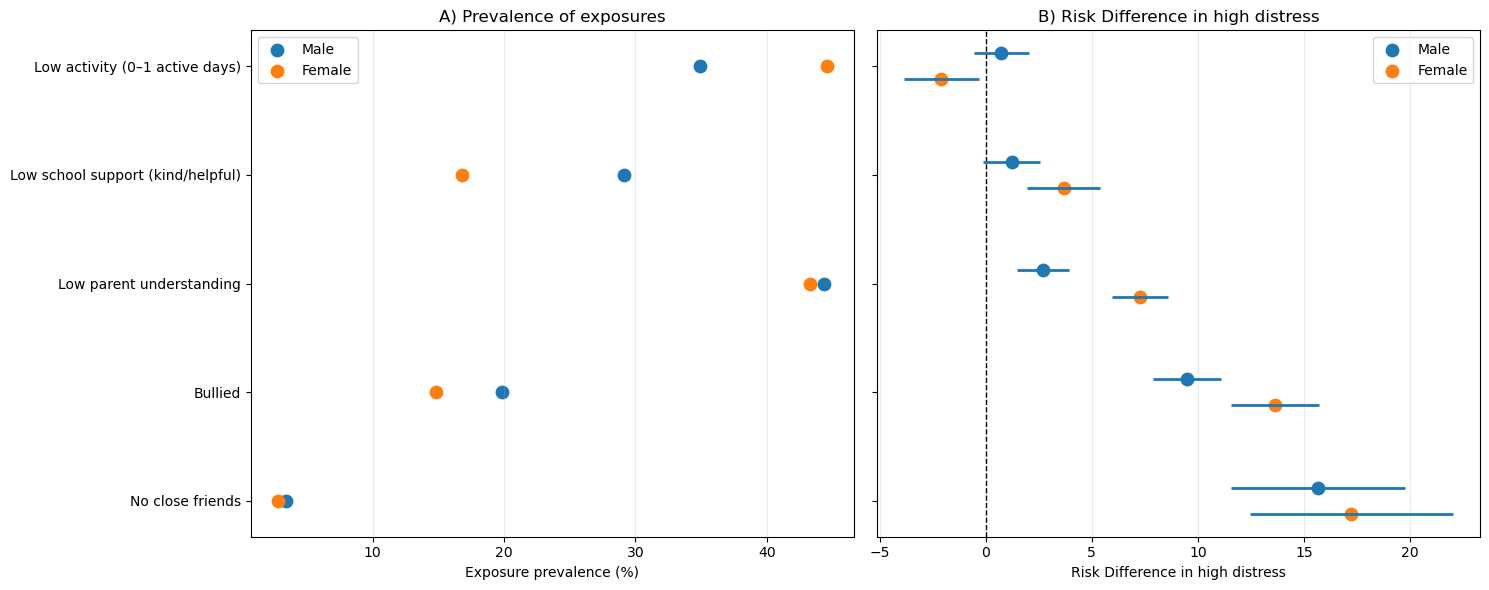

                         exposure    sex  prevalence_exposed        rd     rd_lo     rd_hi  n_exposed  n_unexposed
                 No close friends Female            2.803370 17.225658 12.439725 22.011591        356        12343
                 No close friends   Male            3.436535 15.651500 11.551540 19.751461        434        12195
                          Bullied Female           14.837263 13.650274 11.582059 15.718488       1787        10257
                          Bullied   Male           19.880782  9.485519  7.874542 11.096497       2368         9543
         Low parent understanding Female           43.257278  7.271786  5.931706  8.611866       5498         4158
         Low parent understanding   Male           44.367363  2.697667  1.490779  3.904555       5628         4107
Low school support (kind/helpful) Female           16.779421  3.683249  1.958964  5.407535       2133         6993
Low school support (kind/helpful)   Male           29.132183  1.224452 -0.116006

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# Plot 2: Explain gender gap via (A) exposure prevalence + (B) sex-stratified RD
# - Panel A shows REAL prevalence among ALL students (no weird denominators)
# - Panel B shows RD (exposed - unexposed) within each sex, with 95% CI
#
# Assumes you already have:
#   df: Malaysia GSHS dataframe
#   df["high_distress"]: binary 0/1
#   df["Q2"]: sex (1=Male, 2=Female)
# =============================================================================

SEX_COL = "Q2"                 # 1=Male, 2=Female
OUTCOME_COL = "high_distress"  # must be 0/1
sex_map = {1: "Male", 2: "Female"}

# =============================================================================
# Recoders
# =============================================================================

def recode_bullied_any(series: pd.Series) -> pd.Series:
    """
    Works for:
      - Q20 (1..7): 1=0 days, 2..7 => bullied >=1 day
      - QN20 (1/2): 1=Yes bullied >=1 day, 2=No
    Returns: 1=exposed (bullied), 0=unexposed, NaN=missing/unknown
    """
    s = series.copy()
    out = pd.Series(np.nan, index=s.index, dtype="float")

    vals = pd.Series(s.dropna().unique())
    try:
        vals = set(vals.astype(int).tolist())
    except Exception:
        return out

    # yes/no summary
    if vals.issubset({1, 2}):
        out.loc[s == 1] = 1.0
        out.loc[s == 2] = 0.0
        return out

    # days categories
    if vals.issubset({1, 2, 3, 4, 5, 6, 7}):
        out.loc[s == 1] = 0.0
        out.loc[s.isin([2, 3, 4, 5, 6, 7])] = 1.0
        return out

    return out


def recode_low_activity_prev_q49(series: pd.Series) -> pd.Series:
    """
    For Panel A prevalence:
      1 = low activity (0–1 active days)
      0 = not low (2–7 active days)
    Uses ALL valid respondents (no dropping the middle).
    Q49 codes: 1..8 correspond to 0..7 days.
    """
    s = series.copy()
    days = s - 1  # 0..7
    out = pd.Series(np.nan, index=s.index, dtype="float")

    valid = days.between(0, 7)
    out.loc[valid] = 0.0
    out.loc[days.isin([0, 1])] = 1.0
    return out


def recode_low_vs_high_extremes_q49(series: pd.Series) -> pd.Series:
    """
    For Panel B RD:
      1 = low extreme (0–1 days)
      0 = high extreme (5–7 days)
      NaN = middle (2–4 days) excluded for a sharp contrast
    """
    s = series.copy()
    days = s - 1
    out = pd.Series(np.nan, index=s.index, dtype="float")

    out.loc[days.isin([0, 1])] = 1.0
    out.loc[days.isin([5, 6, 7])] = 0.0
    return out


def recode_low_support_prev(series: pd.Series) -> pd.Series:
    """
    For Panel A prevalence with Likert 1..5 (Never..Always):
      1 = low support (Never/Rarely) -> 1/2
      0 = otherwise (Sometimes/Most/Always) -> 3/4/5
    """
    s = series.copy()
    out = pd.Series(np.nan, index=s.index, dtype="float")

    out.loc[s.isin([1, 2])] = 1.0
    out.loc[s.isin([3, 4, 5])] = 0.0
    return out


def recode_low_support_extremes(series: pd.Series) -> pd.Series:
    """
    For Panel B RD with Likert 1..5:
      1 = low support (Never/Rarely) -> 1/2
      0 = high support (Most/Always) -> 4/5
      NaN = middle (Sometimes=3) excluded to sharpen contrast
    """
    s = series.copy()
    out = pd.Series(np.nan, index=s.index, dtype="float")

    out.loc[s.isin([1, 2])] = 1.0
    out.loc[s.isin([4, 5])] = 0.0
    # 3 stays NaN
    return out


def recode_yes_no_12(series: pd.Series) -> pd.Series:
    """
    Generic recode for yes/no variables coded:
      1 = Yes
      2 = No
    Returns 1 for Yes (exposed), 0 for No, NaN otherwise.
    """
    s = series.copy()
    out = pd.Series(np.nan, index=s.index, dtype="float")
    out.loc[s == 1] = 1.0
    out.loc[s == 2] = 0.0
    return out


# =============================================================================
# Stats: sex-stratified risk difference with Wald CI
# =============================================================================
def risk_diff_wald(df_, exposure_col, outcome_col):
    """
    df_ contains exposure (0/1) and outcome (0/1).
    Returns RD and 95% CI in percentage points.
    """
    clean = df_[[exposure_col, outcome_col]].dropna()

    if clean.empty:
        return None

    # Ensure exposure is 0/1
    if not set(clean[exposure_col].unique()).issubset({0.0, 1.0, 0, 1}):
        return None
    # Ensure outcome is 0/1
    if not set(clean[outcome_col].unique()).issubset({0, 1, 0.0, 1.0}):
        raise ValueError(f"Outcome {outcome_col} must be binary 0/1.")

    exposed = clean.loc[clean[exposure_col] == 1, outcome_col]
    unexp  = clean.loc[clean[exposure_col] == 0, outcome_col]
    n1, n0 = len(exposed), len(unexp)
    if n1 == 0 or n0 == 0:
        return None

    p1, p0 = exposed.mean(), unexp.mean()
    rd = p1 - p0
    se = np.sqrt(p1 * (1 - p1) / n1 + p0 * (1 - p0) / n0)
    lo, hi = rd - 1.96 * se, rd + 1.96 * se

    return {
        "n_exposed": n1,
        "n_unexposed": n0,
        "p_exposed": p1 * 100,
        "p_unexposed": p0 * 100,
        "rd": rd * 100,
        "rd_lo": lo * 100,
        "rd_hi": hi * 100,
    }


# =============================================================================
# Configure exposures for Plot 2 (edit var names if your df differs)
# =============================================================================
exposures = {
    # Social stress
    "Bullied": {
        "var_candidates": ["Q20", "QN20"],
        "recode_prev": recode_bullied_any,
        "recode_rd": recode_bullied_any,
        "category": "Social",
    },

    # Physical activity
    "Low activity (0–1 active days)": {
        "var_candidates": ["Q49"],
        "recode_prev": recode_low_activity_prev_q49,      # REAL prevalence among all
        "recode_rd": recode_low_vs_high_extremes_q49,     # sharp contrast for RD
        "category": "Physical",
    },

    # Social support (Likert)
    "Low school support (kind/helpful)": {
        "var_candidates": ["Q54"],
        "recode_prev": recode_low_support_prev,
        "recode_rd": recode_low_support_extremes,
        "category": "Social",
    },
    "Low parent understanding": {
        "var_candidates": ["Q56"],
        "recode_prev": recode_low_support_prev,
        "recode_rd": recode_low_support_extremes,
        "category": "Social",
    },

    # Friends (Yes/No summary, if present)
    "No close friends": {
        "var_candidates": ["QN27"],
        "recode_prev": recode_yes_no_12,
        "recode_rd": recode_yes_no_12,
        "category": "Social",
    },
}

# =============================================================================
# Build plot dataframe
# =============================================================================
rows = []

for exp_name, info in exposures.items():
    var = next((v for v in info["var_candidates"] if v in df.columns), None)
    if var is None:
        print(f"Skipping {exp_name}: none of {info['var_candidates']} found in df")
        continue

    prev_col = f"{var}__prev_bin"
    rd_col   = f"{var}__rd_bin"

    df[prev_col] = info["recode_prev"](df[var])
    df[rd_col]   = info["recode_rd"](df[var])

    # Panel A: REAL prevalence (mean of 0/1 over ALL valid respondents)
    prev_by_sex = (
        df[[SEX_COL, prev_col]]
        .dropna()
        .groupby(SEX_COL)[prev_col]
        .mean() * 100
    )

    # Panel B: sex-stratified RD of high_distress
    for sex_code, sex_label in sex_map.items():
        sub = df.loc[df[SEX_COL] == sex_code]
        rd = risk_diff_wald(sub, rd_col, OUTCOME_COL)
        if rd is None:
            continue

        rows.append({
            "exposure": exp_name,
            "category": info["category"],
            "sex": sex_label,
            "prevalence_exposed": float(prev_by_sex.get(sex_code, np.nan)),
            "rd": rd["rd"],
            "rd_lo": rd["rd_lo"],
            "rd_hi": rd["rd_hi"],
            "n_exposed": rd["n_exposed"],
            "n_unexposed": rd["n_unexposed"],
        })

plot_df = pd.DataFrame(rows)
if plot_df.empty:
    raise ValueError("No exposures computed. Check variable names, recoding, and outcome availability.")

# Sort exposures by female RD magnitude (helps storytelling)
female_order = (
    plot_df.loc[plot_df["sex"] == "Female"]
    .set_index("exposure")["rd"]
    .abs()
    .sort_values(ascending=False)
    .index
)
# If female missing for some exposures, fall back to overall
if len(female_order) == 0:
    female_order = (
        plot_df.groupby("exposure")["rd"]
        .apply(lambda s: np.nanmean(np.abs(s)))
        .sort_values(ascending=False)
        .index
    )

plot_df["exposure"] = pd.Categorical(plot_df["exposure"], categories=list(female_order), ordered=True)
plot_df = plot_df.sort_values(["exposure", "sex"]).reset_index(drop=True)

# =============================================================================
# Prepare arrays for plotting
# =============================================================================
exposures_ordered = list(plot_df["exposure"].cat.categories)
y = np.arange(len(exposures_ordered))

def arr(sex_label, col):
    return (
        plot_df.loc[plot_df["sex"] == sex_label]
        .set_index("exposure")[col]
        .reindex(exposures_ordered)
        .to_numpy()
    )

prev_m = arr("Male", "prevalence_exposed")
prev_f = arr("Female", "prevalence_exposed")

rd_m   = arr("Male", "rd")
rdm_lo = arr("Male", "rd_lo")
rdm_hi = arr("Male", "rd_hi")

rd_f   = arr("Female", "rd")
rdf_lo = arr("Female", "rd_lo")
rdf_hi = arr("Female", "rd_hi")

# =============================================================================
# Plot
# =============================================================================
fig_h = max(4.8, 0.8 * len(exposures_ordered) + 2.0)
fig, axes = plt.subplots(1, 2, figsize=(15, fig_h), sharey=True)

# Panel A: exposure prevalence
ax = axes[0]
ax.scatter(prev_m, y, s=80, label="Male")
ax.scatter(prev_f, y, s=80, label="Female")
ax.set_yticks(y)
ax.set_yticklabels(exposures_ordered)
ax.set_xlabel("Exposure prevalence (%)")
ax.set_title("A) Prevalence of exposures")
ax.grid(axis="x", alpha=0.25)
ax.legend(loc="upper left")

# Panel B: RD by sex with CI (offset for readability)
ax = axes[1]
ax.axvline(0, color="black", ls="--", lw=1)

offset = 0.12
# Male
ax.scatter(rd_m, y + offset, s=80, label="Male")
ax.hlines(y + offset, rdm_lo, rdm_hi, lw=2)
# Female
ax.scatter(rd_f, y - offset, s=80, label="Female")
ax.hlines(y - offset, rdf_lo, rdf_hi, lw=2)

ax.set_xlabel("Risk Difference in high distress")
ax.set_title("B) Risk Difference in high distress")
ax.grid(axis="x", alpha=0.25)
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

# =============================================================================
# Optional: print table for reporting
# =============================================================================
display_cols = ["exposure", "sex", "prevalence_exposed", "rd", "rd_lo", "rd_hi", "n_exposed", "n_unexposed"]
print(plot_df[display_cols].to_string(index=False))


In [57]:
import json

# Open and read the JSON file
with open('StudentCareServicesGEOJSON.json', 'r') as file:
    data = json.load(file)

# Display the structure to understand the data
print("JSON file loaded successfully!")
print("\nData type:", type(data))

# If it's a dictionary, show the keys
if isinstance(data, dict):
    print("\nAvailable keys:", list(data.keys()))
    # Display first few items to understand structure
    for key in list(data.keys())[:5]:
        print(f"\n{key}:", type(data[key]))
        if isinstance(data[key], (list, dict)):
            print(f"  Length/Size: {len(data[key])}")

# If it's a list, show first few items
elif isinstance(data, list):
    print(f"\nNumber of items: {len(data)}")
    if len(data) > 0:
        print("\nFirst item structure:")
        print(data[0])

JSON file loaded successfully!

Data type: <class 'dict'>

Available keys: ['type', 'name', 'features']

type: <class 'str'>

name: <class 'str'>

features: <class 'list'>
  Length/Size: 347


In [58]:
# Inspect the GeoJSON data structure
print("=" * 70)
print("GEOJSON DATA INSPECTION")
print("=" * 70)

# Check if it's a GeoJSON FeatureCollection
if isinstance(data, dict) and 'type' in data:
    print(f"\nGeoJSON Type: {data['type']}")
    
    if data['type'] == 'FeatureCollection' and 'features' in data:
        features = data['features']
        print(f"Number of features: {len(features)}")
        
        # Inspect first feature
        if len(features) > 0:
            print("\n" + "-" * 70)
            print("FIRST FEATURE STRUCTURE:")
            print("-" * 70)
            first_feature = features[0]
            
            print(f"Feature type: {first_feature.get('type')}")
            print(f"Geometry type: {first_feature.get('geometry', {}).get('type')}")
            
            # Properties (attributes)
            if 'properties' in first_feature:
                props = first_feature['properties']
                print(f"\nNumber of properties: {len(props)}")
                print("\nProperty keys:")
                for key in props.keys():
                    print(f"  - {key}: {props[key]}")
            
            # Sample a few more features to understand the data
            print("\n" + "-" * 70)
            print("SAMPLE OF ALL FEATURES (first 5):")
            print("-" * 70)
            for i, feature in enumerate(features[:5]):
                props = feature.get('properties', {})
                print(f"\nFeature {i}:")
                print(f"  Geometry: {feature.get('geometry', {}).get('type')}")
                # Print key properties (adjust based on what you see)
                for key, val in list(props.items())[:5]:
                    print(f"  {key}: {val}")

# Convert to DataFrame for easier analysis
print("\n" + "=" * 70)
print("CONVERTING TO DATAFRAME")
print("=" * 70)

if isinstance(data, dict) and data.get('type') == 'FeatureCollection':
    # Extract properties from all features
    properties_list = [feature['properties'] for feature in data['features']]
    geo_df = pd.DataFrame(properties_list)
    
    print(f"\nDataFrame shape: {geo_df.shape}")
    print(f"\nColumn names:")
    print(geo_df.columns.tolist())
    
    print("\nFirst few rows:")
    print(geo_df.head())
    
    print("\nData types:")
    print(geo_df.dtypes)
    
    print("\nBasic statistics:")
    print(geo_df.describe())
    
    print("\nMissing values:")
    print(geo_df.isnull().sum())

GEOJSON DATA INSPECTION

GeoJSON Type: FeatureCollection
Number of features: 347

----------------------------------------------------------------------
FIRST FEATURE STRUCTURE:
----------------------------------------------------------------------
Feature type: Feature
Geometry type: Point

Number of properties: 23

Property keys:
  - OBJECTID: 5668
  - AUDIT_DATE: 20240118
  - AUDIT_STATUS: Grade A
  - H_2014: None
  - H_2016: None
  - H_2018: None
  - H_2020: None
  - H_2022: None
  - H_2024: None
  - H_2026: None
  - NAME_OF_STUDENT_CARE_CENTRE: Commit Learning SchoolHouse @ Bishan
  - SCC_ADDRESS: 245, Bishan Street 22, #B1-320,  SINGAPORE 570245
  - SCC_POSTAL_CODE: 570245
  - SCC_TELEPHONE: 97243866
  - SCC_EMAIL: scfa_administrative@commitlearning.com.sg
  - BUSINESS_PROFILE: Commercial Companies
  - UNIQUE_ID: 23207
  - SCFA_Y_N: Y
  - MONTHLY_FEE: $320
  - H_2028: None
  - ENROLMENT: 14
  - INC_CRC: 02F1B5DA4AC05E10
  - FMEL_UPD_D: 20251023110851

----------------------------

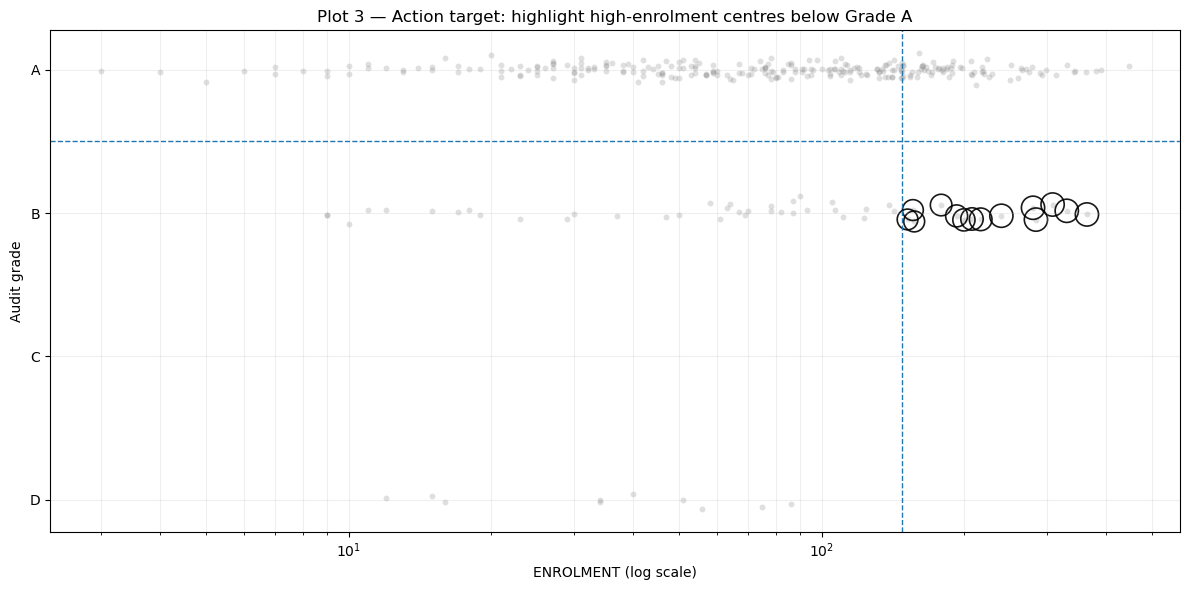

Priority centres count: 14 out of 321


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_scc = geo_df.copy()

df_scc["AUDIT_GRADE"] = df_scc["AUDIT_STATUS"].astype(str).str.extract(r"Grade\s*([A-D])", expand=False)
grade_to_score = {"A": 4, "B": 3, "C": 2, "D": 1}
df_scc["AUDIT_SCORE"] = df_scc["AUDIT_GRADE"].map(grade_to_score)
df_scc["ENROLMENT"] = pd.to_numeric(df_scc["ENROLMENT"], errors="coerce")
plot_df = df_scc.dropna(subset=["ENROLMENT", "AUDIT_SCORE"]).copy()
plot_df = plot_df.loc[plot_df["ENROLMENT"] > 0].copy()

# Priority definition
enrol_thresh = plot_df["ENROLMENT"].quantile(0.75)
plot_df["PRIORITY"] = (plot_df["ENROLMENT"] >= enrol_thresh) & (plot_df["AUDIT_SCORE"] <= 3)

# Small jitter
rng = np.random.default_rng(42)
y = plot_df["AUDIT_SCORE"].to_numpy().astype(float) + rng.normal(0, 0.04, size=len(plot_df))

fig, ax = plt.subplots(figsize=(12, 6))

# Context layer: all points small, grey
ax.scatter(plot_df["ENROLMENT"], y, s=18, c="gray", alpha=0.25, linewidths=0)

# Priority layer: only priority points bigger + outlined
pri = plot_df["PRIORITY"].to_numpy()
size_pri = np.clip(np.sqrt(plot_df.loc[pri, "ENROLMENT"]) * 18, 60, 280)
ax.scatter(plot_df.loc[pri, "ENROLMENT"], y[pri], s=size_pri,
           facecolors="none", edgecolors="black", linewidths=1.2, alpha=0.9)

ax.set_xscale("log")
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["D", "C", "B", "A"])
ax.set_xlabel("ENROLMENT (log scale)")
ax.set_ylabel("Audit grade")
ax.axvline(enrol_thresh, linestyle="--", linewidth=1)
ax.axhline(3.5, linestyle="--", linewidth=1)

ax.set_title("Plot 3 — Action target: highlight high-enrolment centres below Grade A")
ax.grid(True, which="both", alpha=0.2)
plt.tight_layout()
plt.show()

print(f"Priority centres count: {pri.sum()} out of {len(plot_df)}")


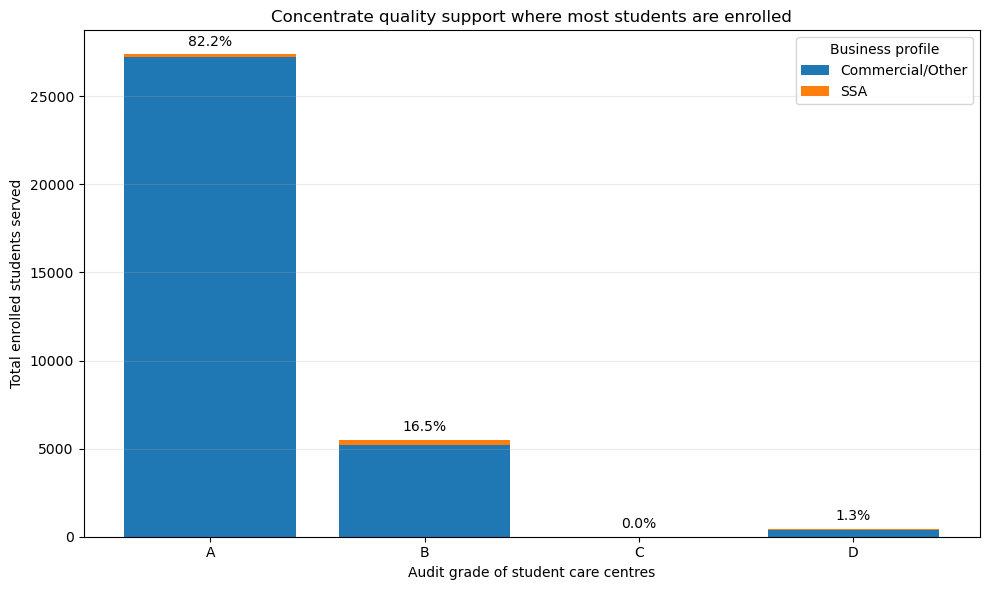

Share of enrolled students in centres graded B or below: 17.8%


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_scc = geo_df.copy()

# Grade parsing
df_scc["AUDIT_GRADE"] = (
    df_scc["AUDIT_STATUS"].astype(str)
    .str.extract(r"Grade\s*([A-D])", expand=False)
)

# Keep valid
df_scc["ENROLMENT"] = pd.to_numeric(df_scc["ENROLMENT"], errors="coerce")
plot_df = df_scc.dropna(subset=["AUDIT_GRADE", "ENROLMENT"]).copy()

# Simplify profile
plot_df["PROFILE"] = plot_df["BUSINESS_PROFILE"].astype(str)
plot_df.loc[plot_df["PROFILE"].str.contains("Social Service", case=False, na=False), "PROFILE"] = "SSA"
plot_df.loc[plot_df["PROFILE"] != "SSA", "PROFILE"] = "Commercial/Other"

# Order grades
grade_order = ["A", "B", "C", "D"]
plot_df["AUDIT_GRADE"] = pd.Categorical(plot_df["AUDIT_GRADE"], categories=grade_order, ordered=True)

# Aggregate: total enrolment by grade + profile
agg = (plot_df
       .groupby(["AUDIT_GRADE", "PROFILE"], observed=True)["ENROLMENT"]
       .sum()
       .unstack(fill_value=0)
       .reindex(grade_order))

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(agg))

for col in agg.columns:
    ax.bar(agg.index.astype(str), agg[col].values, bottom=bottom, label=col)
    bottom += agg[col].values

totals = agg.sum(axis=1)  # total enrolment per grade (after stacking)
grand_total = totals.sum()

for i, grade in enumerate(agg.index.astype(str)):
    val = totals.loc[grade]
    pct = 100 * val / grand_total if grand_total > 0 else 0
    ax.text(i, val + grand_total*0.01, f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)



ax.set_title("Concentrate quality support where most students are enrolled")
ax.set_xlabel("Audit grade of student care centres")
ax.set_ylabel("Total enrolled students served")
ax.grid(axis="y", alpha=0.25)
ax.legend(title="Business profile", loc="upper right")
plt.tight_layout()
plt.show()

# Optional: headline metric for your write-up
total = plot_df["ENROLMENT"].sum()
b_or_below = plot_df.loc[plot_df["AUDIT_GRADE"].isin(["B", "C", "D"]), "ENROLMENT"].sum()
print(f"Share of enrolled students in centres graded B or below: {b_or_below/total:.1%}")


